# Standardization


In [96]:
import pandas as pd

In [112]:
new_df = pd.read_csv("Data.csv")

In [98]:
df.head(3)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No


In [99]:
X = df.iloc[:, :-1].values

In [100]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [101]:
y=df.iloc[:,3:]

In [102]:
y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
x=df[["Age","Salary"]]
x

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [105]:
sc = StandardScaler()

transform = sc.fit_transform(x)

In [106]:
transform

array([[ 0.71993143,  0.71101276],
       [-1.62367514, -1.36437583],
       [-1.21009751, -0.84552869],
       [-0.10722383, -0.24020701],
       [ 0.16849459,         nan],
       [-0.52080146, -0.49963059],
       [        nan, -1.01847774],
       [ 1.27136827,  1.31633443],
       [ 1.54708669,  1.66223253],
       [-0.24508304,  0.27864014]])

In [107]:
df["Age"]=transform[:,0]

In [108]:
df["Salary"]=transform[:,1]

In [109]:
df

,Country,Age,Salary,Purchased
0,France,0.719931,0.711013,No
1,Spain,-1.623675,-1.364376,Yes
2,Germany,-1.210098,-0.845529,No
3,Spain,-0.107224,-0.240207,No
4,Germany,0.168495,NaN,Yes
5,France,-0.520801,-0.499631,Yes
6,Spain,NaN,-1.018478,No
7,France,1.271368,1.316334,Yes
8,Germany,1.547087,1.662233,No
9,France,-0.245083,0.278640,Yes


In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

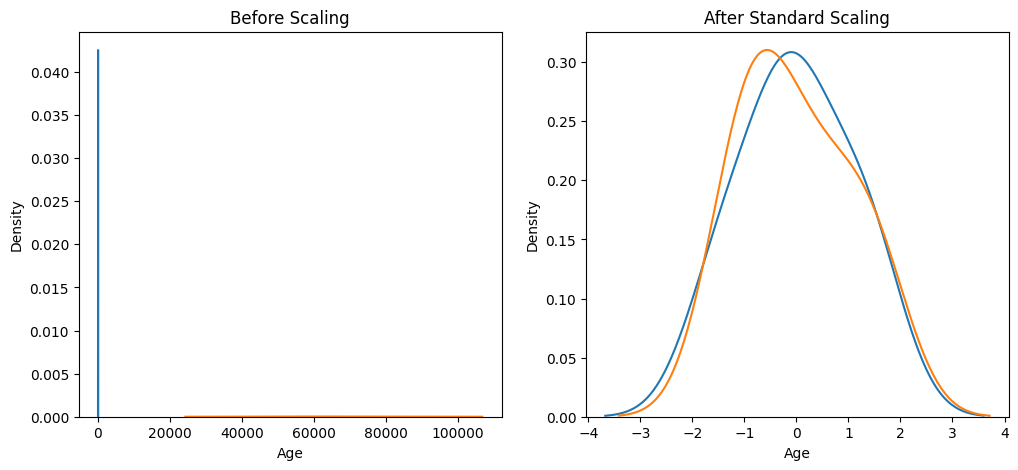

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(new_df['Age'], ax=ax1)
sns.kdeplot(new_df['Salary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(df['Age'], ax=ax2)
sns.kdeplot(df['Salary'], ax=ax2)
plt.show()


<Axes: xlabel='Age', ylabel='Density'>

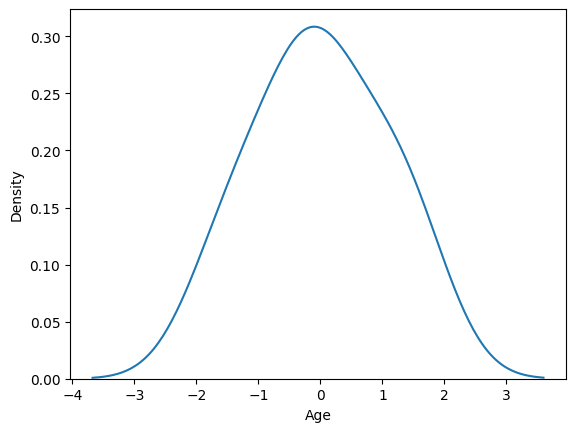

In [119]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Age', ylabel='Density'>

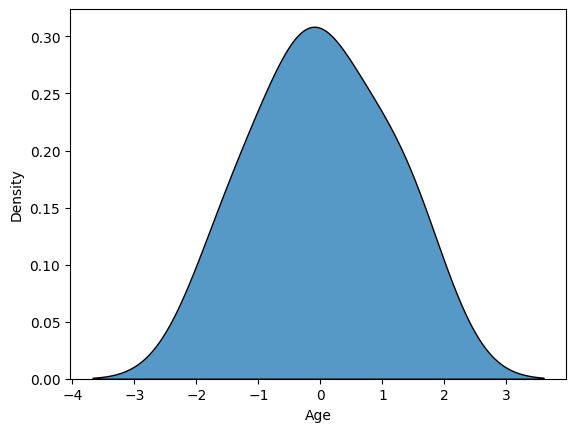

In [126]:
sns.kdeplot(df["Age"], multiple="stack")

In [150]:
new_df=pd.read_csv("Social_Network_Ads.csv")
new_df=new_df.iloc[:,2:]
new_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [151]:
X_train,X_test,y_train,y_test=train_test_split(new_df.drop("Purchased",axis=1),new_df["Purchased"],test_size=0.3,random_state=0)

In [152]:
scalled=StandardScaler()

In [162]:
x_train_scalled=scalled.fit_transform(X_train)
x_test_scalled=scalled.fit_transform(X_test)

In [163]:
x_test_scalled.shape

(120, 2)

In [164]:
x_train_scalled.shape

(280, 2)

In [165]:
x_train_df=pd.DataFrame(x_train_scalled,columns=X_train.columns)

In [166]:
x_train_df

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [169]:
x_test_df = pd.DataFrame(x_test_scalled, columns=X_test.columns)

In [170]:
x_test_df

,Age,EstimatedSalary
0,-0.648073,0.530803
1,0.075357,-0.597376
2,-0.195929,0.164907
3,-0.648073,0.286873
4,-0.195929,-0.597376
...,...,...
115,1.070073,-0.140006
116,0.708358,1.872421
117,-0.557644,0.591786
118,0.798787,0.378347


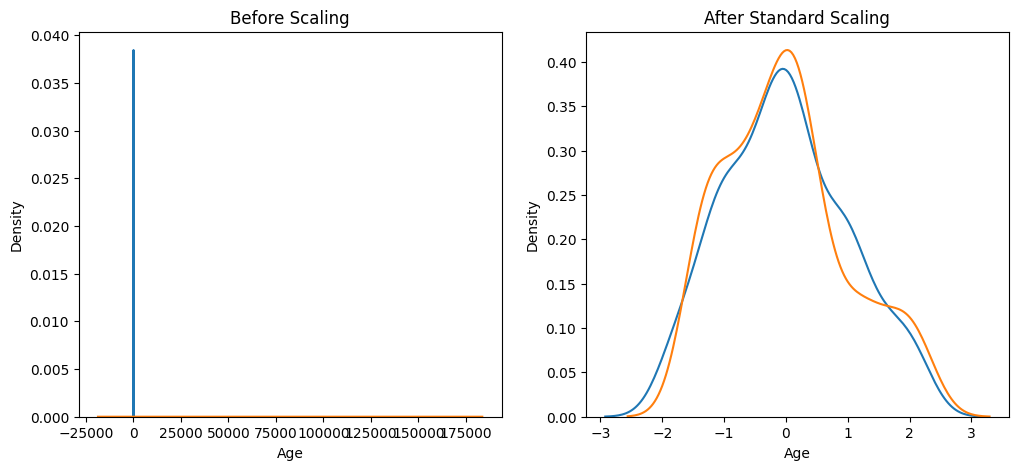

In [172]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_df['Age'], ax=ax2)
sns.kdeplot(x_train_df['EstimatedSalary'], ax=ax2)
plt.show()

# Normalisation

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
data=load_iris()


In [5]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
from sklearn.preprocessing import MinMaxScaler

/home/mohsin/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


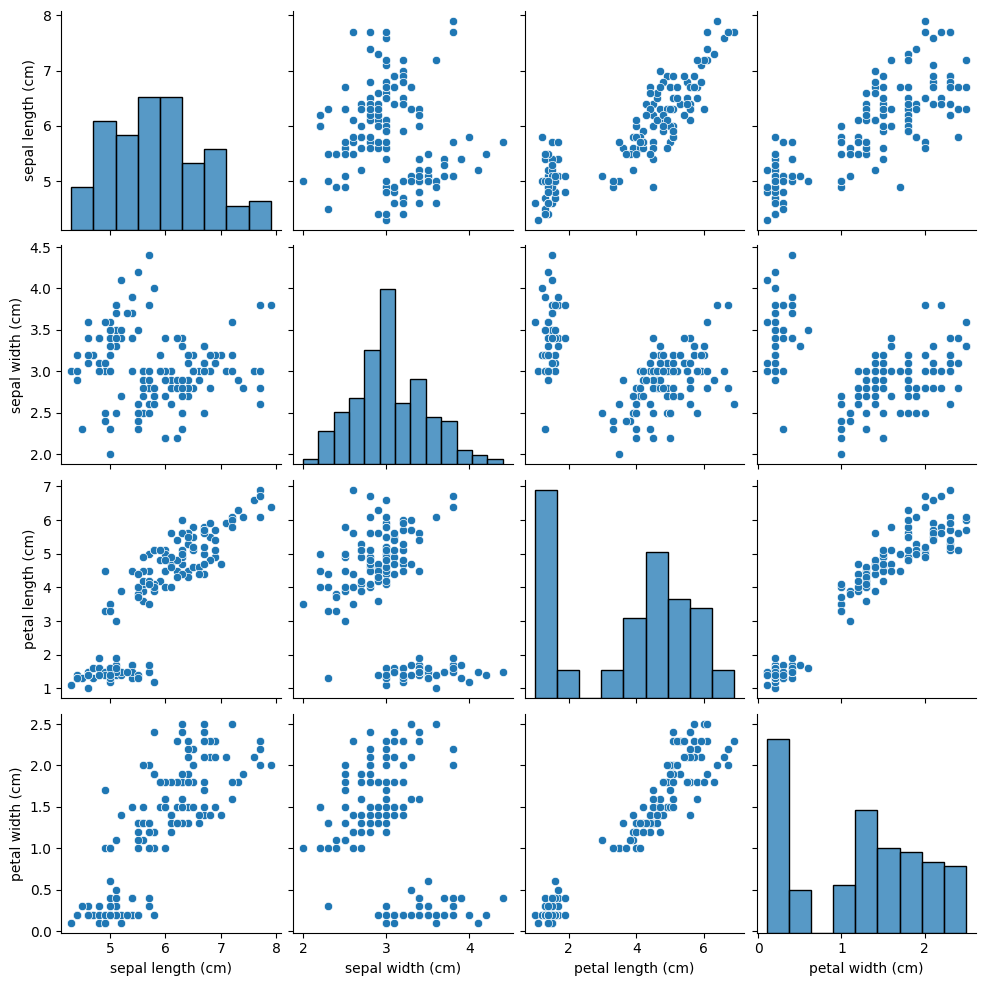

In [13]:
sns.pairplot(df)

In [16]:
scalled_df=MinMaxScaler()

In [17]:
x=scalled_df.fit_transform(df)

In [18]:
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [19]:
new_df=pd.DataFrame(data=x,columns=df.columns)

In [20]:
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [21]:
new_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/home/mohsin/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


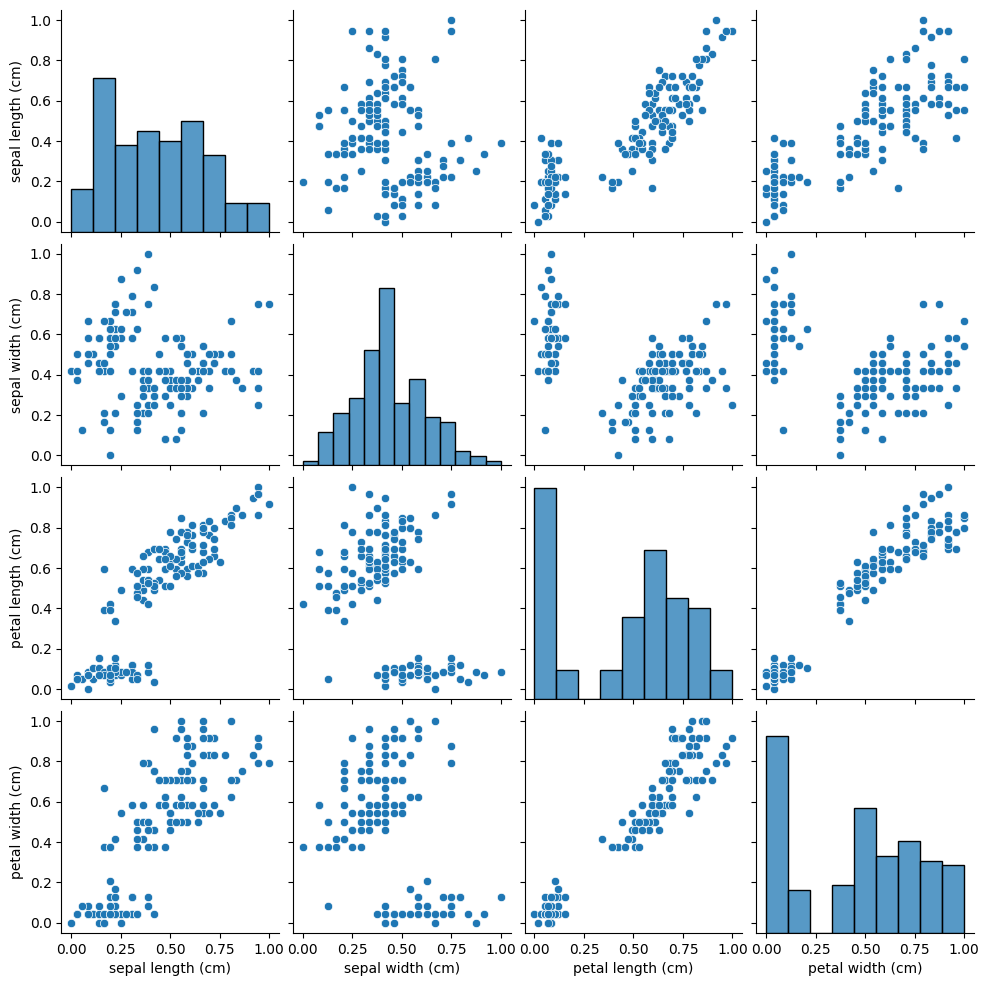

In [23]:
sns.pairplot(new_df)

In [24]:
from sklearn.datasets import load_wine

In [26]:
data=load_wine()

In [27]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']